In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:/OneDrive/egitim/verilen/bogazici-compec-python-ml/Datasets/housing.csv")

# Veri Keşfi

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Nitelikler açıklama

In [4]:
# her bir kayıt bir semt veya mahalleye aittir
# Koordinatlar mahallenin merkezini gösterir.
# housing_median_age: ortanca bina yaşı
# total_rooms: toplam oda sayısı
# total_bedrooms: toplam yatak odası sayısı
# population: nüfus
# households: hane sayısı
# median_income: ortanca gelir
# median_house_value: ortanca konut değeri (hedef değişken)
# ocean_proximity: okyanısa yakınlık

# Temel betimsel istatistikler

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# total_bedrooms 20.433 kayıt. Yani 207 adet kayıp var.
# Tek kategorik değişken ocean_proximity

# Kategorik değişken bazlı inceleme 

In [8]:
# pd.options.display.float_format = '{:,.2f}'.format
df.groupby(['ocean_proximity']).median_house_value.agg(['mean','count']).sort_values('count', ascending=False).head()

,mean,count
ocean_proximity,,
<1H OCEAN,240084.285464,9136
INLAND,124805.392001,6551
NEAR OCEAN,249433.977427,2658
NEAR BAY,259212.311790,2290
ISLAND,380440.000000,5


# Histogram

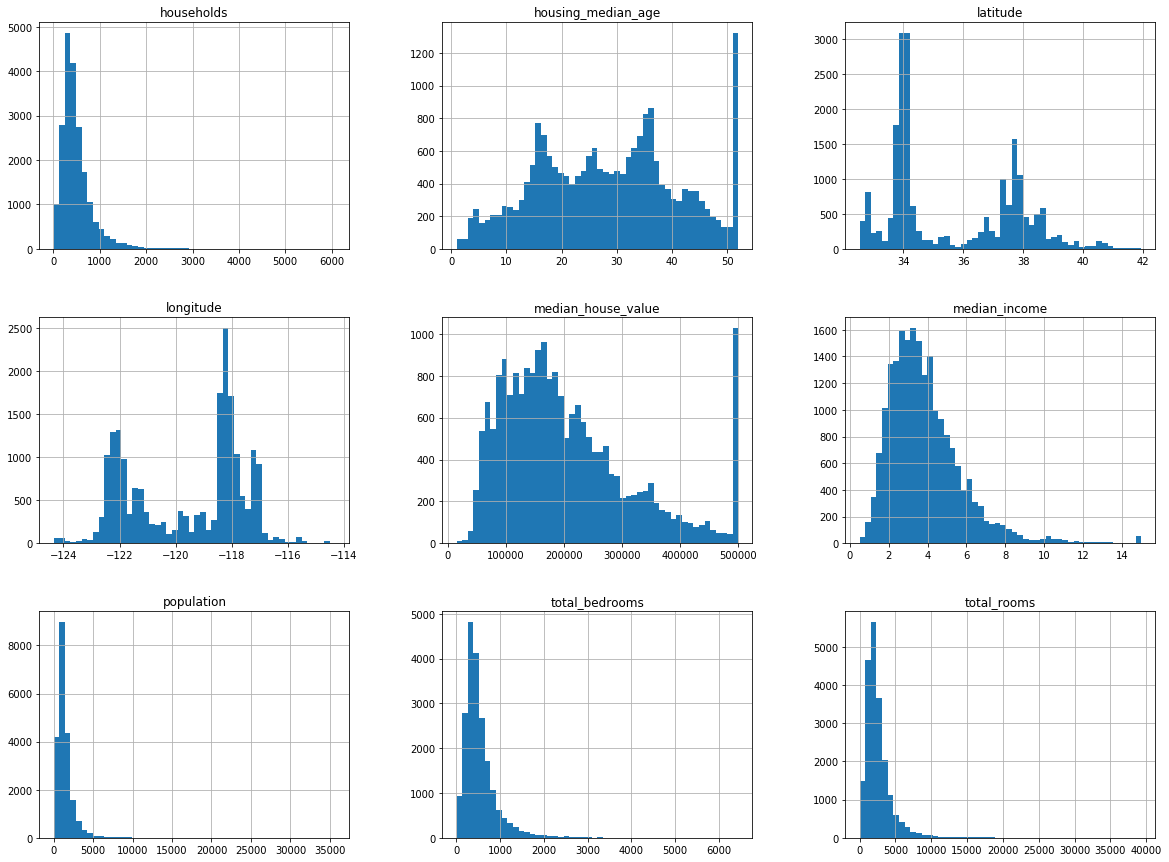

In [9]:
# Sadece nümerik değişkenler için çizilir
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Kayıp veriyi tamamlama

In [10]:
# Hiç null var mı?
df.isnull().values.any()

True

In [11]:
# total_bedrooms null olanları filtreleme
df[df.total_bedrooms.isnull()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [16]:
# total_bedrooms dağılımı normal olmadığı için stratejiyi median yapmak daha sağlıklı
from sklearn.impute import SimpleImputer

In [17]:
imputer = SimpleImputer(strategy='median')

In [18]:
df['total_bedrooms'] = imputer.fit_transform(df['total_bedrooms'].values.reshape(-1,1))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
# Tüm satırlar eşit sayıda olduğuna göre eksik veri kalmadı.

# Multivariate Normal Distribution Varsayımı

In [21]:
# Bu şarta uymayan nitelikleri histogramlarda az çok seçebiliyoruz.
# households, median_income, population, total_rooms, total_bedrooms

In [22]:
from sklearn.preprocessing import PowerTransformer

In [23]:
power_transformer = PowerTransformer(method='box-cox')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002397CA70550>]],
      dtype=object)

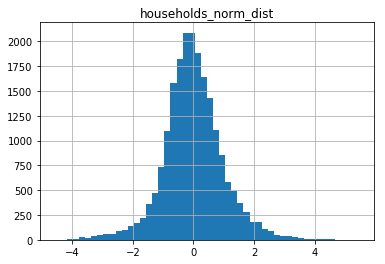

In [24]:
df['households_norm_dist'] = power_transformer.fit_transform(df['households'].values.reshape(-1,1))
df[['households_norm_dist']].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002397CDE54A8>]],
      dtype=object)

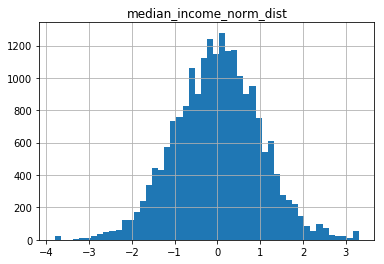

In [25]:
df['median_income_norm_dist'] = power_transformer.fit_transform(df['median_income'].values.reshape(-1,1))
df[['median_income_norm_dist']].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002397CD85FD0>]],
      dtype=object)

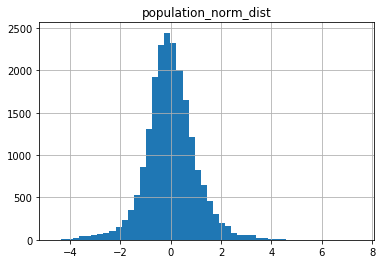

In [26]:
df['population_norm_dist'] = power_transformer.fit_transform(df['population'].values.reshape(-1,1))
df[['population_norm_dist']].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002397D1946D8>]],
      dtype=object)

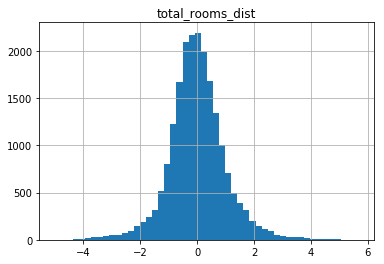

In [27]:
df['total_rooms_dist'] = power_transformer.fit_transform(df['total_rooms'].values.reshape(-1,1))
df[['total_rooms_dist']].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002397DC7AE48>]],
      dtype=object)

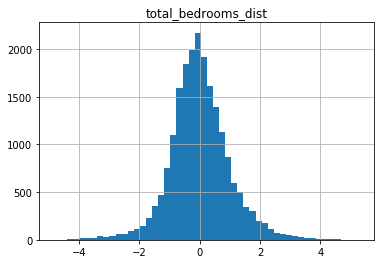

In [28]:
df['total_bedrooms_dist'] = power_transformer.fit_transform(df['total_bedrooms'].values.reshape(-1,1))
df[['total_bedrooms_dist']].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002397DCDDCC0>]],
      dtype=object)

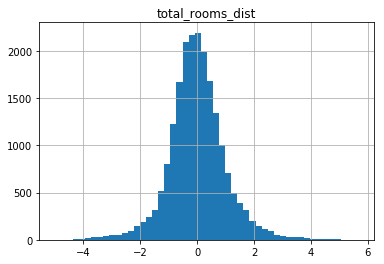

In [29]:
df['total_rooms_dist'] = power_transformer.fit_transform(df['total_rooms'].values.reshape(-1,1))
df[['total_rooms_dist']].hist(bins=50)

In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,households_norm_dist,median_income_norm_dist,population_norm_dist,total_rooms_dist,total_bedrooms_dist
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-1.517201,1.916290,-1.618362,-1.157638,-1.575894
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.634592,1.909694,1.090062,1.896642,1.444741
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-1.134194,1.601978,-1.139047,-0.534638,-1.133477
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-0.877485,1.035967,-0.999677,-0.713676,-0.873734
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-0.665587,0.198026,-0.984697,-0.399654,-0.650113


# korelasyonlar

In [31]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,households_norm_dist,median_income_norm_dist,population_norm_dist,total_rooms_dist,total_bedrooms_dist
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,0.058161,-0.015288,0.114546,0.033967,0.065475
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,-0.087530,-0.085441,-0.137726,-0.034096,-0.070690
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,-0.275917,-0.138611,-0.277041,-0.349427,-0.299936
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,0.808738,0.226528,0.758695,0.875931,0.815889
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,0.867810,0.022629,0.792115,0.833446,0.892109
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,0.807838,0.029615,0.880745,0.756778,0.780808
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,0.897460,0.045898,0.829390,0.834400,0.876538
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.005461,0.949098,-0.004869,0.219065,-0.023393
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.076267,0.659298,-0.025156,0.165510,0.055753
households_norm_dist,0.058161,-0.087530,-0.275917,0.808738,0.867810,0.807838,0.897460,0.005461,0.076267,1.000000,0.053170,0.926183,0.928205,0.972116


# nümerik değişkenlerin hedef değişkenle olan korelasyonları

In [33]:
# eski değişkenlerle (normal dağılıma map edilmemiş)
df.corrwith(df['median_house_value']).sort_values(ascending=False)

median_house_value         1.000000
median_income              0.688075
median_income_norm_dist    0.659298
total_rooms_dist           0.165510
total_rooms                0.134153
housing_median_age         0.105623
households_norm_dist       0.076267
households                 0.065843
total_bedrooms_dist        0.055753
total_bedrooms             0.049457
population                -0.024650
population_norm_dist      -0.025156
longitude                 -0.045967
latitude                  -0.144160
dtype: float64

In [34]:
from pandas.plotting import scatter_matrix

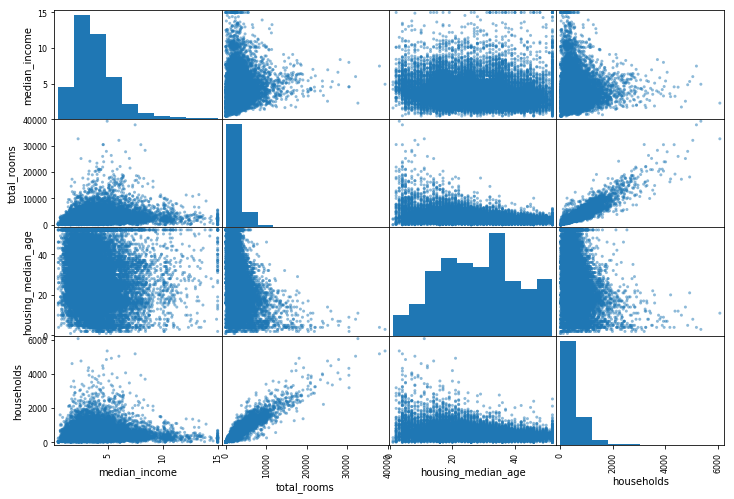

In [35]:
scatter_matrix(df[['median_income','total_rooms','housing_median_age','households']], figsize=(12,8))
plt.show()

# Hedef değişken ile en yüksek korelasyona sahip nitelik ile saçılma diyagramı

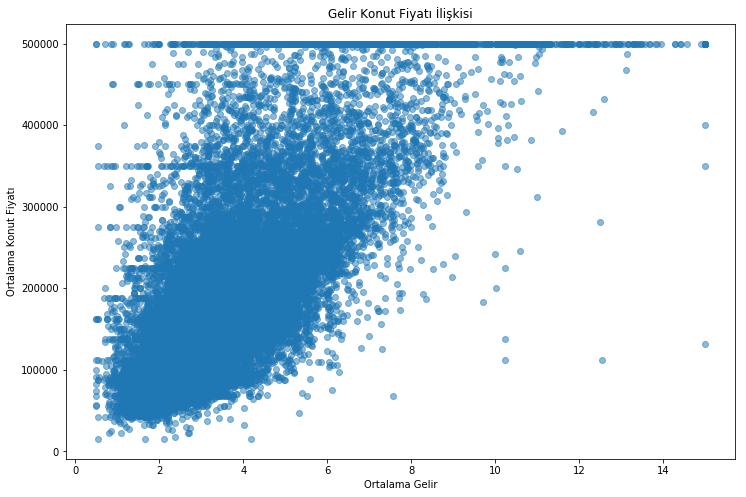

In [36]:
x = df.median_income
y=df.median_house_value

plt.figure(figsize=(12,8))
plt.scatter(x, y, alpha=0.5)
plt.xlabel("Ortalama Gelir")
plt.ylabel("Ortalama Konut Fiyatı")
plt.title("Gelir Konut Fiyatı İlişkisi")
plt.show()

# Nitelik Çıkarma (Feature Extraction)

In [37]:
# toplam oda sayısı ve yatak odası sayısı kendi başına anlamsız duruyor. 
# Bunları hane başına düşen ortalama oda sayılarına çevirelim
# Ayrıca nüfus belli hane sayısı belli buradan hane başı ortalam nüfusu hesaplayabiliriz

In [42]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'households_norm_dist',
       'median_income_norm_dist', 'population_norm_dist', 'total_rooms_dist',
       'total_bedrooms_dist', 'rooms_per_households', 'bed_rooms_per_room',
       'bed_rooms_per_households', 'population_per_households'],
      dtype='object')

In [43]:
# 'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'
df['rooms_per_households'] = df['total_rooms_dist'] / df['households_norm_dist']
df['bed_rooms_per_room'] = df['total_bedrooms_dist'] / df['total_rooms']
df['bed_rooms_per_households'] = df['total_bedrooms_dist'] / df['households_norm_dist']
df['population_per_households'] = df['population_norm_dist'] / df['households_norm_dist']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,households_norm_dist,median_income_norm_dist,population_norm_dist,total_rooms_dist,total_bedrooms_dist,rooms_per_households,bed_rooms_per_room,bed_rooms_per_households,population_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-1.517201,1.916290,-1.618362,-1.157638,-1.575894,0.763009,-0.001791,1.038685,1.066676
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.634592,1.909694,1.090062,1.896642,1.444741,1.160316,0.000204,0.883854,0.666871
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-1.134194,1.601978,-1.139047,-0.534638,-1.133477,0.471381,-0.000773,0.999368,1.004279
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-0.877485,1.035967,-0.999677,-0.713676,-0.873734,0.813320,-0.000686,0.995726,1.139252
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-0.665587,0.198026,-0.984697,-0.399654,-0.650113,0.600453,-0.000400,0.976751,1.479442


In [44]:
# Korelasyonlara tekrar bakalım
df.corrwith(df['median_house_value']).sort_values(ascending=False)

median_house_value           1.000000
median_income                0.688075
median_income_norm_dist      0.659298
total_rooms_dist             0.165510
total_rooms                  0.134153
housing_median_age           0.105623
households_norm_dist         0.076267
households                   0.065843
total_bedrooms_dist          0.055753
total_bedrooms               0.049457
population_per_households    0.011823
bed_rooms_per_room           0.009431
bed_rooms_per_households    -0.002336
population                  -0.024650
population_norm_dist        -0.025156
rooms_per_households        -0.025348
longitude                   -0.045967
latitude                    -0.144160
dtype: float64

In [45]:
# Yeni eklediğimiz niteliklerin hedef değişken ile ilişkisi fena değil

In [46]:
# dataframe kontrolü yapalım ve diske yazalım
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,households_norm_dist,median_income_norm_dist,population_norm_dist,total_rooms_dist,total_bedrooms_dist,rooms_per_households,bed_rooms_per_room,bed_rooms_per_households,population_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-1.517201,1.916290,-1.618362,-1.157638,-1.575894,0.763009,-0.001791,1.038685,1.066676
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.634592,1.909694,1.090062,1.896642,1.444741,1.160316,0.000204,0.883854,0.666871
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-1.134194,1.601978,-1.139047,-0.534638,-1.133477,0.471381,-0.000773,0.999368,1.004279
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-0.877485,1.035967,-0.999677,-0.713676,-0.873734,0.813320,-0.000686,0.995726,1.139252
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-0.665587,0.198026,-0.984697,-0.399654,-0.650113,0.600453,-0.000400,0.976751,1.479442


# Nitelikleri sıralama

In [47]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'households_norm_dist',
       'median_income_norm_dist', 'population_norm_dist', 'total_rooms_dist',
       'total_bedrooms_dist', 'rooms_per_households', 'bed_rooms_per_room',
       'bed_rooms_per_households', 'population_per_households'],
      dtype='object')

In [48]:
df = df[['ocean_proximity',
         'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',  'households_norm_dist',
       'median_income_norm_dist', 'population_norm_dist', 'total_rooms_dist',
       'total_bedrooms_dist', 'rooms_per_households', 'bed_rooms_per_room',
       'bed_rooms_per_households', 'population_per_households',
       'median_house_value']]

In [49]:
df.to_csv(path_or_buf="D:\\OneDrive\\egitim\\verilen\\bogazici-compec-python-ml\\Datasets\\housing_part1.csv", 
          sep=",", index=False, header=True)